# Binary Classification

First I will try implementing a binomial logistic regression. It will classify yes or no for a given species.

While it is possible to use sklearn for this, we will write the implementation with just pandas and numpy because it is more fun.

In [514]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

data = pd.read_csv('./datasets/iris.csv')
print(data.head())
print()
print(data.describe())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%  

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

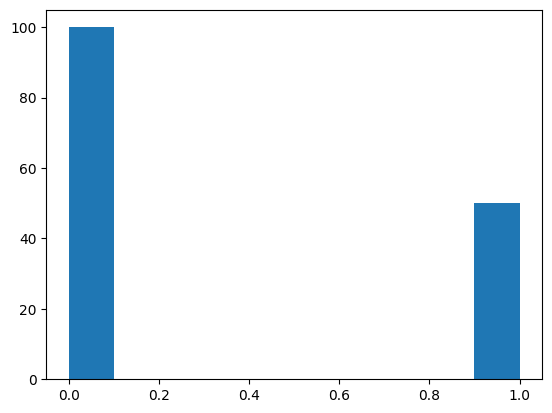

In [515]:
species = data['Species'].unique()
# print(species)   ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

spec = "Iris-virginica"
data['Species'] = data['Species'].map(lambda x: 1 if x == spec else 0)

# Plot number of spec and non spec
plt.hist(data['Species'])

Copied from https://www.kaggle.com/code/jagannathrk/logistic-regression-from-scratch-python

The sigmoid function is the function we are trying to fit to the data. The weights are what need to be found and they represent (roughly) how much each feature or independant variables affects the probablity.

The loss function essentially tells us how off the prediction is. This loss function is what the the model tries to minimise by gradient desecnt (moving in direction of the negative gradient). The functions that follow to (a) calculate the gradient given the loss and the current weights and (b) to update the weights.

In [516]:
# THe logistic function  we are trying to fit
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))


# Gradient Descent
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

### On the selection of the hyperparameters (epochs and lr)

After messing around with the parameters, it appears that `Iris-setosa` and `Iris-virginica` can be classified with above 99% accuracy, whereas `Iris-versicolor` can only reach around 75% accuracy with logisitc regression.


#### Side notes:
- The training-testing idea has been used to bifurcate the dataset to check for overfitting. I have not used a validation set as that seemed unecsessary.

- It was very interesting to observe the effet of normalizing the features before training. Without normalizing it, the loss function was erratic but still achieved the same accuracy eventually. With normalization, the loss function is smooth.

In [517]:
#Normalize the data except the target
def normalize(X):
    for feature in X.columns:
        mean = X[feature].mean()  
        std = X[feature].std()
        X.loc[:, feature] = (X[feature] - mean) / std

    return X

# Split the data into training and test sets
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

X = train_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = normalize(X)
X = np.c_[np.ones(X.shape[0]), X]
y = train_data['Species']

0.0%: loss: 2.374967155427119 	
10.0%: loss: 0.2727042740027381 	
20.0%: loss: 0.21756537452715546 	
30.0%: loss: 0.18832044961595876 	
40.0%: loss: 0.1682513705642565 	
50.0%: loss: 0.15330336131068154 	
60.0%: loss: 0.14165829931191845 	
70.0%: loss: 0.1323019867196579 	
80.0%: loss: 0.12460594394552865 	
90.0%: loss: 0.11815525838617037 	


Text(0, 0.5, 'Loss')

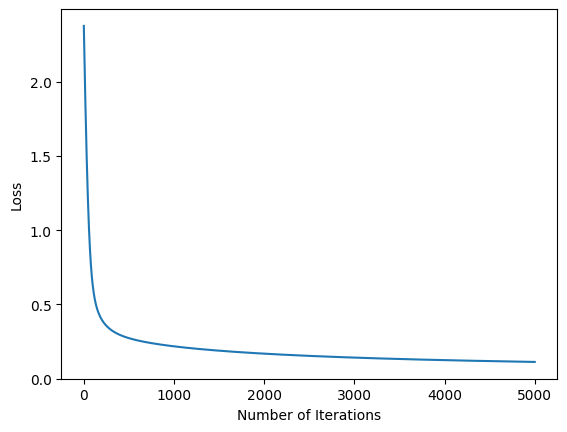

In [518]:
iters = 5000

weights = (np.random.rand(X.shape[1])-0.5)*4
# weights = np.zeros(X.shape[1])

history = {}
for i in range(iters):
    h = sigmoid(X, weights)
    gradient = gradient_descent(X, h, y)
    weights = update_weight_loss(weights, 0.03, gradient)
    
    #Track the loss
    history[i] = {'loss': loss(h, y)}
    if i % (iters/10) == 0:
        print(f'{i/iters * 100}%: loss: {loss(h, y)} \t')

#plot the loss
plt.figure()
plt.plot(list(history.keys()), [history[i]['loss'] for i in history.keys()])
# plt.yscale('log')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')


In [519]:
#Calculate the accuracy on the test data set
X = test_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = normalize(X)
X = np.c_[np.ones(X.shape[0]), X]
y = test_data['Species']
y_pred = np.round(sigmoid(X, weights))
accuracy = (y == y_pred).mean()
print(f'Accuracy: {accuracy}')

Accuracy: 1.0
